author : 
> Nabiel Husein Shihab / nabielshihab@hotmail.com

# **PERHITUNGAN LOG EI MENURUT MENDECKI & 'UC'**
***

## **`Menurut Mendecki`**

<img src="Figures\\Log10_EI Mendecki.png" width="800"/> 

Tahapan perhitungan berdasarkan gambar di atas:
1. Crossplot log10_Mo (seismik momen logaritmik) dan log10_Energy (energy logaritmik)
2. Regresi Linear (karena tidak ada kata-kata QQ-Plot)
3. Menghitung menggunakan persamaan Energy Index Mendecki


## **`Menurut 'UC'`**

<img src="Figures\\Log10_EI UC Explanation.png" width="800"/> 
<img src="Figures\\Log10_EI UC formula.png" width="800"/> 

Tahapan perhitungan berdasarkan 'UC:
1. QQ-Plot log10_Mo (seismik momen logaritmik) dan log10_Energy (energy logaritmik)
2. Regresi Linear QQ-Plot
3. Menghitung menggunakan persamaan Energy Index 'UC'




________________________
Karena Ada 2 cara plotting, yaitu Crossplot & QQ-Plot, serta ada 2 formula perhitungan EI, yaitu menurut Mendecki & 'UC', maka akan dihitung 4 log10_EI:
1. log10_EI_uc_cp : linear regression dari cross-plot menggunakan persamaan EI dari 'UC'
1. log10_EI_uc_qq : linear regression dari QQ-plot menggunakan persamaan EI dari 'UC'
1. log10_EI_mendecki_cp : linear regression dari cross-plot menggunakan persamaan EI dari mendecki
1. log10_EI_mendecki_qq : linear regression dari QQ-plot menggunakan persamaan EI dari mendecki

# **`LET'S CODE`**

### Import Modules

In [1]:
from library.mag_of_completeness import *
from library.curve_fitting_method import *
from library.visualization import *

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# visualisasi template
plt.style.use('ggplot')
plt.rcParams["font.size"] = "15"
plt.rcParams['figure.figsize'] = [12, 10]

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 1. Read & Filter Seismic Catalog

Pada bagian ini, akan dilakukan 4 macam seleksi, yaitu:
1. seleksi Nan Values
2. seleksi EI & Energy > 0
3. seleksi Mw berdasarkan Mc

seharusnya ada seleksi terhadap nilai outliers setiap kolom, tetapi banyak data penting yang dianggap sebagai outliers

In [2]:
# Seismic Catalog name
file_name = 'dataset\\Seismic catalog.csv'

# load data csv
raw_catalog = pd.read_csv(file_name)

# dropping NaN values
catalog_na = raw_catalog.dropna()

# seleksi energy / EI 
catalog_na_ei = catalog_na[(catalog_na['Energy_Index'] > 0) & (catalog_na['Energy'] > 0)]

# seleksi event berdasarkan mc 
## magnitude of Completeness & b-value
mc_method = 'maxc'
cv_method = 'b-value pois'
fmd_data = fmd_details(catalog_na_ei['Magnitude'], mc_method)
cv_data = generate_autobvalue(cv_method, fmd_data)
mc = fmd_data['mc']
b_value = cv_data['bvalue']
sd_b = cv_data['unc']

## seleksi event di atas Mc
catalog_na_ei_mc = catalog_na_ei[catalog_na_ei['Magnitude'] >= mc]

# mengubah variabel agar lebih simple
catalog = catalog_na_ei_mc

catalog

,Magnitude,Seismic Moment,Energy,Energy_Index
5,-0.565,1.420133e+08,12.50,1.40
13,-0.769,7.030938e+07,23.50,8.48
19,-0.590,1.304627e+08,11.60,1.43
24,-0.370,2.784431e+08,19.70,0.87
31,-0.389,2.609206e+08,47.00,3.79
...,...,...,...,...
79967,-0.540,1.547283e+08,7.03,0.24
79970,0.197,1.972110e+09,137.00,0.67
79971,-0.292,3.641579e+08,60.10,3.31
79972,0.258,2.439454e+09,263.00,1.56


# 3. Tambah kolom logaritmik

Untuk kolom:
1. Energy Index
2. Seismic Moment
3. Energy

In [3]:
# kolom logaritmik10
catalog['log10_Mo'] = np.log10(catalog['Seismic Moment'])    # untuk menghitung log EI
catalog['log10_Energy'] = np.log10(catalog['Energy'])        # untuk menghitung log EI
catalog['log10_EI'] = np.log10(catalog['Energy_Index'])      # untuk perbandingan hasil perhitungan

catalog

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be se

,Magnitude,Seismic Moment,Energy,Energy_Index,log10_Mo,log10_Energy,log10_EI
5,-0.565,1.420133e+08,12.50,1.40,8.152329,1.096910,0.146128
13,-0.769,7.030938e+07,23.50,8.48,7.847013,1.371068,0.928396
19,-0.590,1.304627e+08,11.60,1.43,8.115486,1.064458,0.155336
24,-0.370,2.784431e+08,19.70,0.87,8.444736,1.294466,-0.060481
31,-0.389,2.609206e+08,47.00,3.79,8.416508,1.672098,0.578639
...,...,...,...,...,...,...,...
79967,-0.540,1.547283e+08,7.03,0.24,8.189570,0.846955,-0.619789
79970,0.197,1.972110e+09,137.00,0.67,9.294931,2.136721,-0.173925
79971,-0.292,3.641579e+08,60.10,3.31,8.561290,1.778874,0.519828
79972,0.258,2.439454e+09,263.00,1.56,9.387293,2.419956,0.193125


# 3. Linear Regression dari Cross-Plot

Text(0.5, 1.0, 'y = 1.27x + (-9.15)')

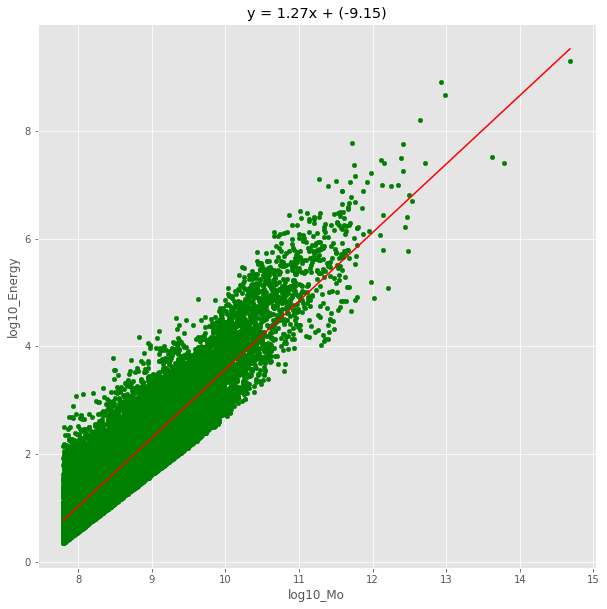

In [4]:
# regresi linear
regressor = LinearRegression()
regressor.fit(catalog['log10_Mo'].values.reshape(-1, 1), catalog['log10_Energy'].values.reshape(-1, 1))        

# parameter regresi
parameters = [regressor.coef_[0][0], regressor.intercept_[0]]

# untuk plot garis regresi
x = np.array([min(catalog['log10_Mo']), max(catalog['log10_Mo'])])
y = (parameters[0] * x + parameters[1])

# visualisasi
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
catalog.plot('log10_Mo', 'log10_Energy', kind='scatter', ax=ax, c='g')
ax.plot(x, y, c='r')
ax.set_title(f"y = {format(parameters[0], '.2f')}x + ({format(parameters[1], '.2f')})")

# 4. Linear Regression dari QQ-Plot

In [5]:
# custom Function
def qq_plot(data1, data2, ax=None):
    #Calculate quantiles
    data1.sort()
    quantile_levels1 = np.arange(len(data1),dtype=float)/len(data1)

    data2.sort()
    quantile_levels2 = np.arange(len(data2),dtype=float)/len(data2)

    #Use the smaller set of quantile levels to create the plot
    quantile_levels = quantile_levels2

    #We already have the set of quantiles for the smaller data set
    quantiles2 = data2

    #We find the set of quantiles for the larger data set using linear interpolation
    quantiles1 = np.interp(quantile_levels,quantile_levels1,data1)
    
    # perform linear regression for QQ-plot
    regressor = LinearRegression()
    regressor.fit(quantiles1.reshape(-1, 1), quantiles2.reshape(-1, 1))        
    
    # Fitted line's coefficient & intercept
    lr_parameters = [regressor.coef_[0][0], regressor.intercept_[0]]   
    
    # check the existence of previous axis
    if ax != None:
        fig = fig
        ax = ax
    else:
        fig = plt.figure()
        ax = fig.add_subplot(111)

    #Plot the quantiles to create the qq plot
    ax.scatter(quantiles1, quantiles2, c='g', edgecolor='k')
    
    x = np.array([min(quantiles1), max(quantiles1)])
    y = lr_parameters[0] * x + lr_parameters[1]
    
    # add a fitted line 
    ax.plot(x, y, c='r', linestyle='--')
    
    # add the title (fitted line equation) and axes labels
    ax.set_title(f"y = {format(lr_parameters[0], '.2f')}x + ({format(lr_parameters[1], '.2f')})")
    ax.set_xlabel('Quantiles of 1st Sample')
    ax.set_ylabel('Quantiles of 2nd Sample')
    
    return lr_parameters

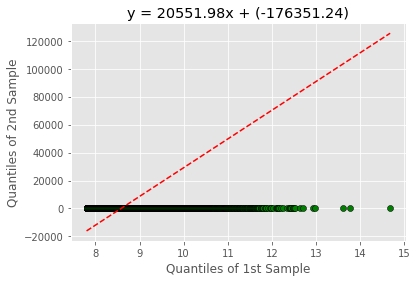

In [6]:
# QQ-Plot dan linear regression
data1 = catalog['log10_Mo'].values
data2 = catalog['log10_Energy'].values

qq_parameters = qq_plot(data1, data2)

In [7]:
data1

array([ 7.79925746,  7.79925796,  7.79929083, ..., 13.6180481 ,
       13.77887447, 14.68033551])

# 5. Penambahan kolom perhitungan EI berdasarkan cara plotting dan formula EI

In [8]:
# cross-plot
catalog.loc[:, 'EI_uc_cp'] = catalog['Energy'] / (catalog['Seismic Moment'] * 10**(parameters[0]))  # 'UC'
catalog.loc[:, 'EI_mendecki_cp'] = catalog['Energy'] / 10**(catalog['log10_Mo'] * parameters[0] + parameters[1]) # Mendecki

# QQ-plot
catalog.loc[:, 'EI_uc_qq'] = catalog['Energy'] / (catalog['Seismic Moment'] * 10**(qq_parameters[0]))  # 'UC'
catalog.loc[:, 'EI_mendecki_qq'] = catalog['Energy'] / 10**(catalog['log10_Mo'] * qq_parameters[0] + qq_parameters[1]) # Mendecki

catalog

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: overflow encount

,Magnitude,Seismic Moment,Energy,Energy_Index,log10_Mo,log10_Energy,log10_EI,EI_uc_cp,EI_mendecki_cp,EI_uc_qq,EI_mendecki_qq
5,-0.565,1.420133e+08,12.50,1.40,8.152329,1.096910,0.146128,4.702484e-09,0.758245,0.0,inf
13,-0.769,7.030938e+07,23.50,8.48,7.847013,1.371068,0.928396,1.785669e-08,3.486638,0.0,inf
19,-0.590,1.304627e+08,11.60,1.43,8.115486,1.064458,0.155336,4.750267e-09,0.783847,0.0,inf
24,-0.370,2.784431e+08,19.70,0.87,8.444736,1.294466,-0.060481,3.779865e-09,0.507399,0.0,inf
31,-0.389,2.609206e+08,47.00,3.79,8.416508,1.672098,0.578639,9.623565e-09,1.314906,0.0,inf
...,...,...,...,...,...,...,...,...,...,...,...
79967,-0.540,1.547283e+08,7.03,0.24,8.189570,0.846955,-0.619789,2.427348e-09,0.382363,0.0,inf
79970,0.197,1.972110e+09,137.00,0.67,9.294931,2.136721,-0.173925,3.711383e-09,0.292375,0.0,0.0
79971,-0.292,3.641579e+08,60.10,3.31,8.561290,1.778874,0.519828,8.817209e-09,1.100203,0.0,inf
79972,0.258,2.439454e+09,263.00,1.56,9.387293,2.419956,0.193125,5.759828e-09,0.428222,0.0,0.0


# 6. Penambahan 4 kolom perhitungan Logaritmik EI

In [9]:
catalog.loc[:, 'log10_EI_uc_cp'] = np.log10(catalog['EI_uc_cp']) 
catalog.loc[:, 'log10_EI_uc_qq'] = np.log10(catalog['EI_uc_qq']) 
catalog.loc[:, 'log10_EI_mendecki_cp'] = np.log10(catalog['EI_mendecki_cp']) 
catalog.loc[:, 'log10_EI_mendecki_qq'] = np.log10(catalog['EI_mendecki_qq']) 

catalog

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1048: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\pandas\core\series.py:679: RuntimeWarning: divide by zero

,Magnitude,Seismic Moment,Energy,Energy_Index,log10_Mo,log10_Energy,log10_EI,EI_uc_cp,EI_mendecki_cp,EI_uc_qq,EI_mendecki_qq,log10_EI_uc_cp,log10_EI_uc_qq,log10_EI_mendecki_cp,log10_EI_mendecki_qq
5,-0.565,1.420133e+08,12.50,1.40,8.152329,1.096910,0.146128,4.702484e-09,0.758245,0.0,inf,-8.327673,-inf,-0.120190,inf
13,-0.769,7.030938e+07,23.50,8.48,7.847013,1.371068,0.928396,1.785669e-08,3.486638,0.0,inf,-7.748199,-inf,0.542407,inf
19,-0.590,1.304627e+08,11.60,1.43,8.115486,1.064458,0.155336,4.750267e-09,0.783847,0.0,inf,-8.323282,-inf,-0.105769,inf
24,-0.370,2.784431e+08,19.70,0.87,8.444736,1.294466,-0.060481,3.779865e-09,0.507399,0.0,inf,-8.422524,-inf,-0.294650,inf
31,-0.389,2.609206e+08,47.00,3.79,8.416508,1.672098,0.578639,9.623565e-09,1.314906,0.0,inf,-8.016664,-inf,0.118895,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79967,-0.540,1.547283e+08,7.03,0.24,8.189570,0.846955,-0.619789,2.427348e-09,0.382363,0.0,inf,-8.614868,-inf,-0.417524,inf
79970,0.197,1.972110e+09,137.00,0.67,9.294931,2.136721,-0.173925,3.711383e-09,0.292375,0.0,0.0,-8.430464,-inf,-0.534059,-inf
79971,-0.292,3.641579e+08,60.10,3.31,8.561290,1.778874,0.519828,8.817209e-09,1.100203,0.0,inf,-8.054669,-inf,0.041473,inf
79972,0.258,2.439454e+09,263.00,1.56,9.387293,2.419956,0.193125,5.759828e-09,0.428222,0.0,0.0,-8.239590,-inf,-0.368331,-inf


c:\users\user\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1291: RuntimeWarning: invalid value encountered in double_scalars
  stats['iqr'] = q3 - q1
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1236: RuntimeWarning: invalid value encountered in double_scalars
  notch_min = med - 1.57 * iqr / np.sqrt(N)


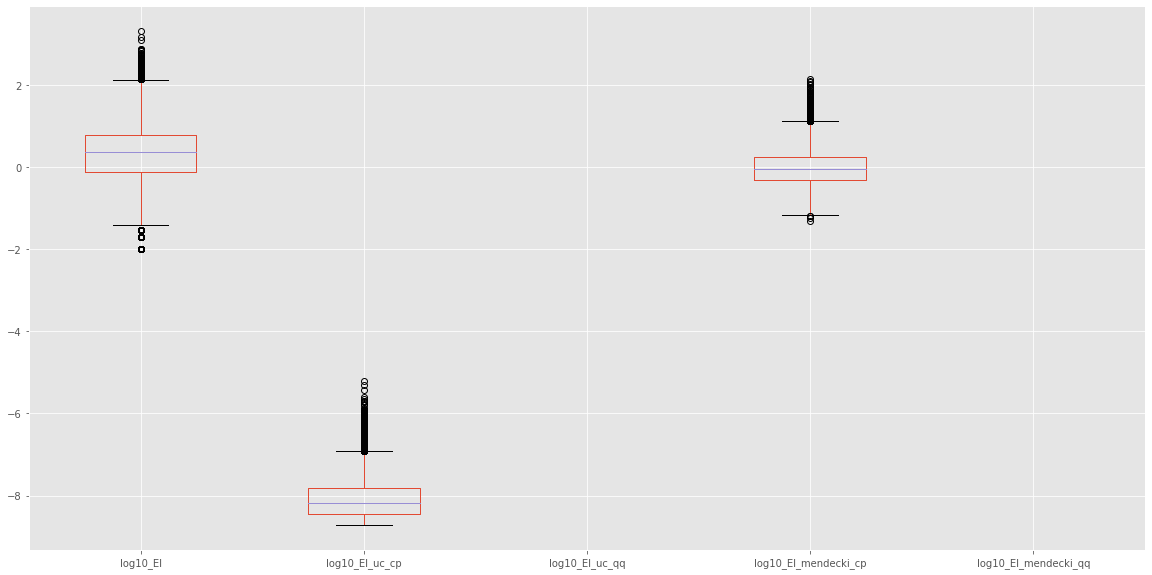

In [10]:
fig, ax = plt.subplots(figsize=(20,10))
catalog[['log10_EI', 'log10_EI_uc_cp', 'log10_EI_uc_qq', 'log10_EI_mendecki_cp', 'log10_EI_mendecki_qq']].plot(kind='box', ax=ax)